# Week 13

### Topic
 1. Intro to the Donner party data
 1. BACK TO SLIDES TO TALK ABOUT LOGIT FUNCTION
 1. Beginning logistic regression
 1. Multiple GLM!
 1. BACK TO SLIDES



In [1]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=300)

Loading required package: repr



## 1. Intro to the Donner party data

See slides for more info on this dataset.

In [3]:
#install.packages("alr4") # run once

For ease of use, rename:

In [9]:
donner = alr4::Donner

For this dataset: outcome = 1 means alive, 0=dead

In [10]:
head(donner)

,age,y,sex,family.name,status
,<int>,<fct>,<fct>,<fct>,<fct>
Breen_Edward_,13,survived,Male,Breen,Family
Breen_Margaret_Isabella,1,survived,Female,Breen,Family
Breen_James_Frederick,5,survived,Male,Breen,Family
Breen_John,14,survived,Male,Breen,Family
Breen_Margaret_Bulger,40,survived,Female,Breen,Family
Breen_Patrick,51,survived,Male,Breen,Family


Grab status (alive/dead) and age individually:

In [11]:
status = donner$y #donner[,2]
age = donner$age #donner[,1]

Let's see the distributions of who lived/died with age:

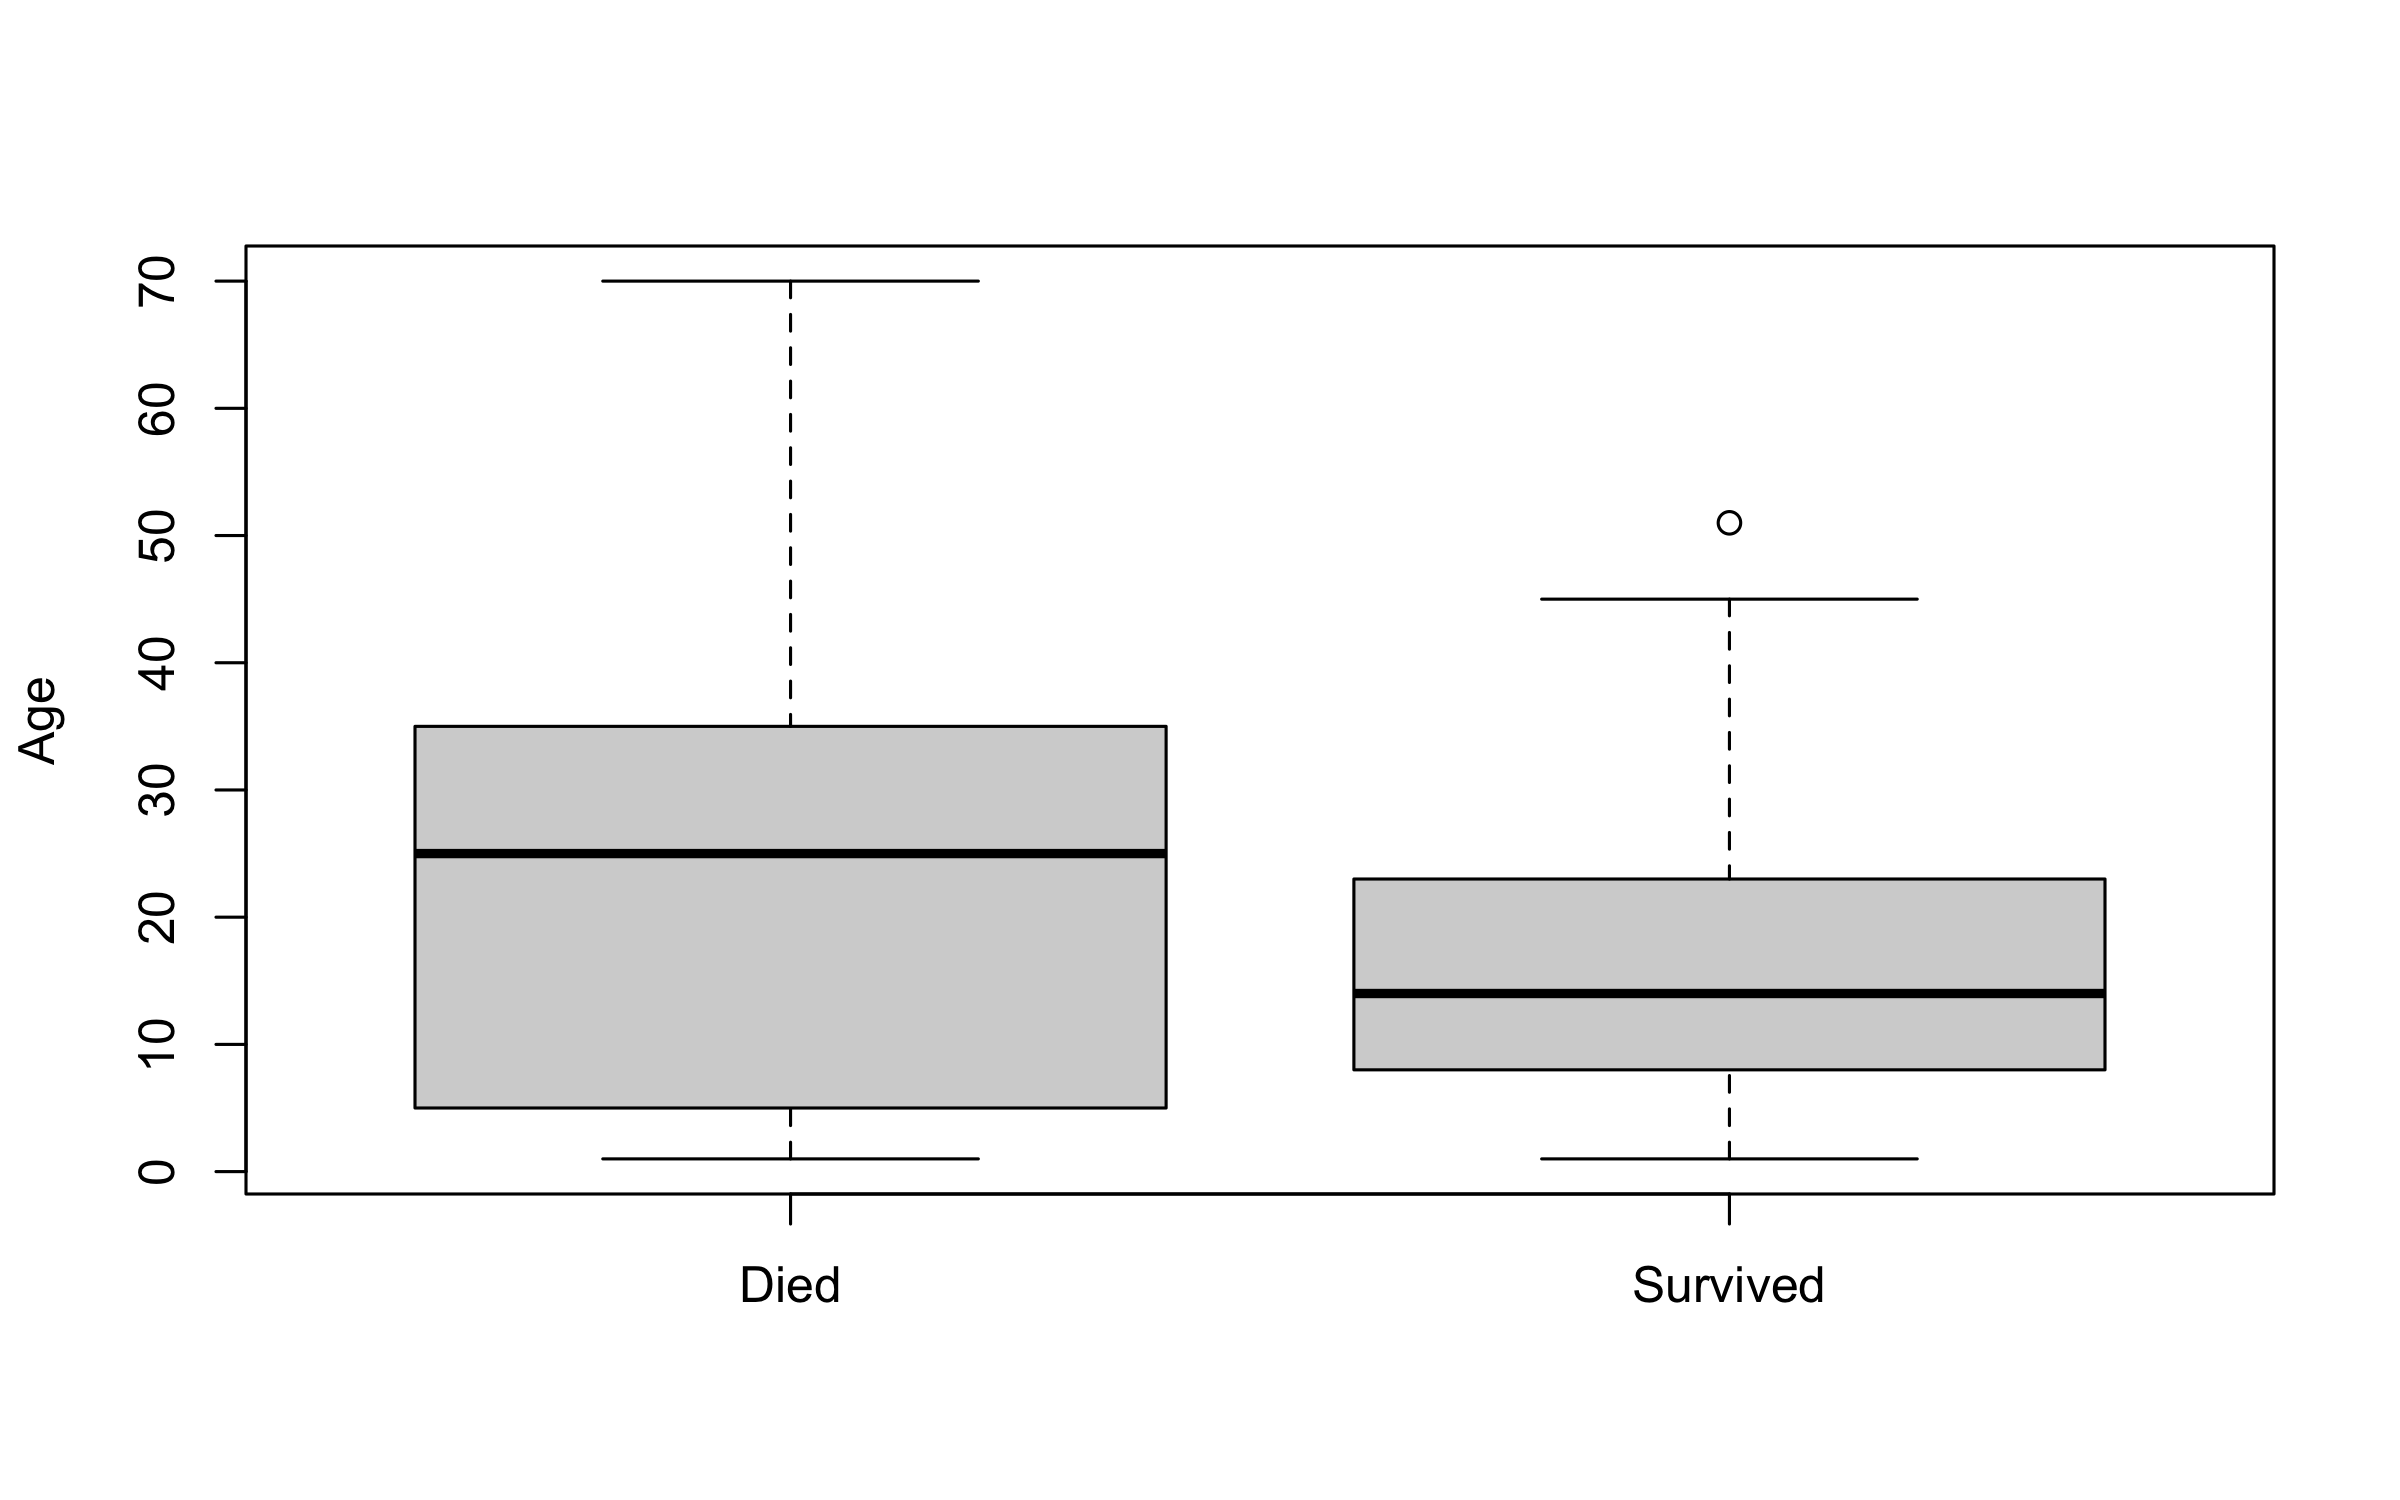

In [24]:
#boxplot(age[status==0],age[status==1],names = c('Died', 'Survived'), ylab='Age')

boxplot(age[status=='died'],age[status=='survived'],names = c('Died', 'Survived'), ylab='Age')

This makes sense - older folks tended to die, while the young survived.  It also makes sense that the spread of who died is large - probably young childern did not make it either.

To use the logistic function, our life will be easier if we tag "Died" as 0 and "Survived" as one, so we'll add this column to our dataset:

In [31]:
donner$outcome = rep(0,nrow(donner))
donner$outcome[status=='survived'] = 1

In [32]:
head(donner)

,age,y,sex,family.name,status,outcome
,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
Breen_Edward_,13,survived,Male,Breen,Family,1
Breen_Margaret_Isabella,1,survived,Female,Breen,Family,1
Breen_James_Frederick,5,survived,Male,Breen,Family,1
Breen_John,14,survived,Male,Breen,Family,1
Breen_Margaret_Bulger,40,survived,Female,Breen,Family,1
Breen_Patrick,51,survived,Male,Breen,Family,1


Let's also see if sex (again, treated here as binary) has any affect on death rate. This is easiest to see with a table:

In [14]:
sex = donner$sex #donner[,3]

In [15]:
table(sex,status)

        status
sex      died survived
  Female   10       25
  Male     32       24

So, it seems like sex also has an effect on survival as 10 women died and 25 lived while 32 men died and only 24 lived.

We can see this more clearly by calculating the table proportions:

In [16]:
print(10./(10+25)) #=0.29, or 29% of women died
print(32./(32+24)) #=0.57 or 57% of men died

[1] 0.2857143
[1] 0.5714286


We can think of how we might want to build a model to predict who is going to live/die (categorical) based on their age (numerical) and their gender (categorical).  Here, "died or not" is an "either or" i.e. whether or not a person died.

How can we do this? Logistical regression to the rescue!

## 2. BACK TO SLIDES TO TALK ABOUT LOGIT FUNCTION

## 3. Beginning logistic regression

Let's actually use R to fit such a linear model:

In [33]:
#glm1 = glm(Outcome ~ Age, data=donner, family=binomial)

glm1 = glm(outcome ~ age, data=donner, family=binomial)

In [34]:
summary(glm1)


Call:
glm(formula = outcome ~ age, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5946  -1.2017   0.8436   0.9882   1.5765  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.97917    0.37460   2.614  0.00895 **
age         -0.03689    0.01493  -2.471  0.01346 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120.86  on 87  degrees of freedom
Residual deviance: 114.02  on 86  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 118.02

Number of Fisher Scoring iterations: 4


Note that our summary is a bit different then the slides $\rightarrow$ we are using a bit of a larger dataset.

But in general, the results are much the same - the intercept is ~1 and the slope along age is negative - so older people are less likely to survive.

What is the probability of survivial of a people of different ages? 

Let's use our model to find out:

In [35]:
person_age = seq(0,80) # range of ages we are interested in modeling

To translate to the probability that someone survived we just need to do one extra step.

We start with the "usual" thing for any linear model - $\beta_0$ and $\beta_1$ $\times$ (explanatory variable):

In [36]:
logit_prob_of_survival_age = glm1$coefficients[1] + glm1$coefficients[2]*person_age

#### The Extra Step:
Now we need to transform it back into probabilities using our link function.

Recall: $\log\left(\frac{p}{1-p} \right)$ = logit_prob_of_survival_age


In [37]:
prob_of_survival_age = exp(logit_prob_of_survival_age)/(1.0 + exp(logit_prob_of_survival_age))

Let's plot:

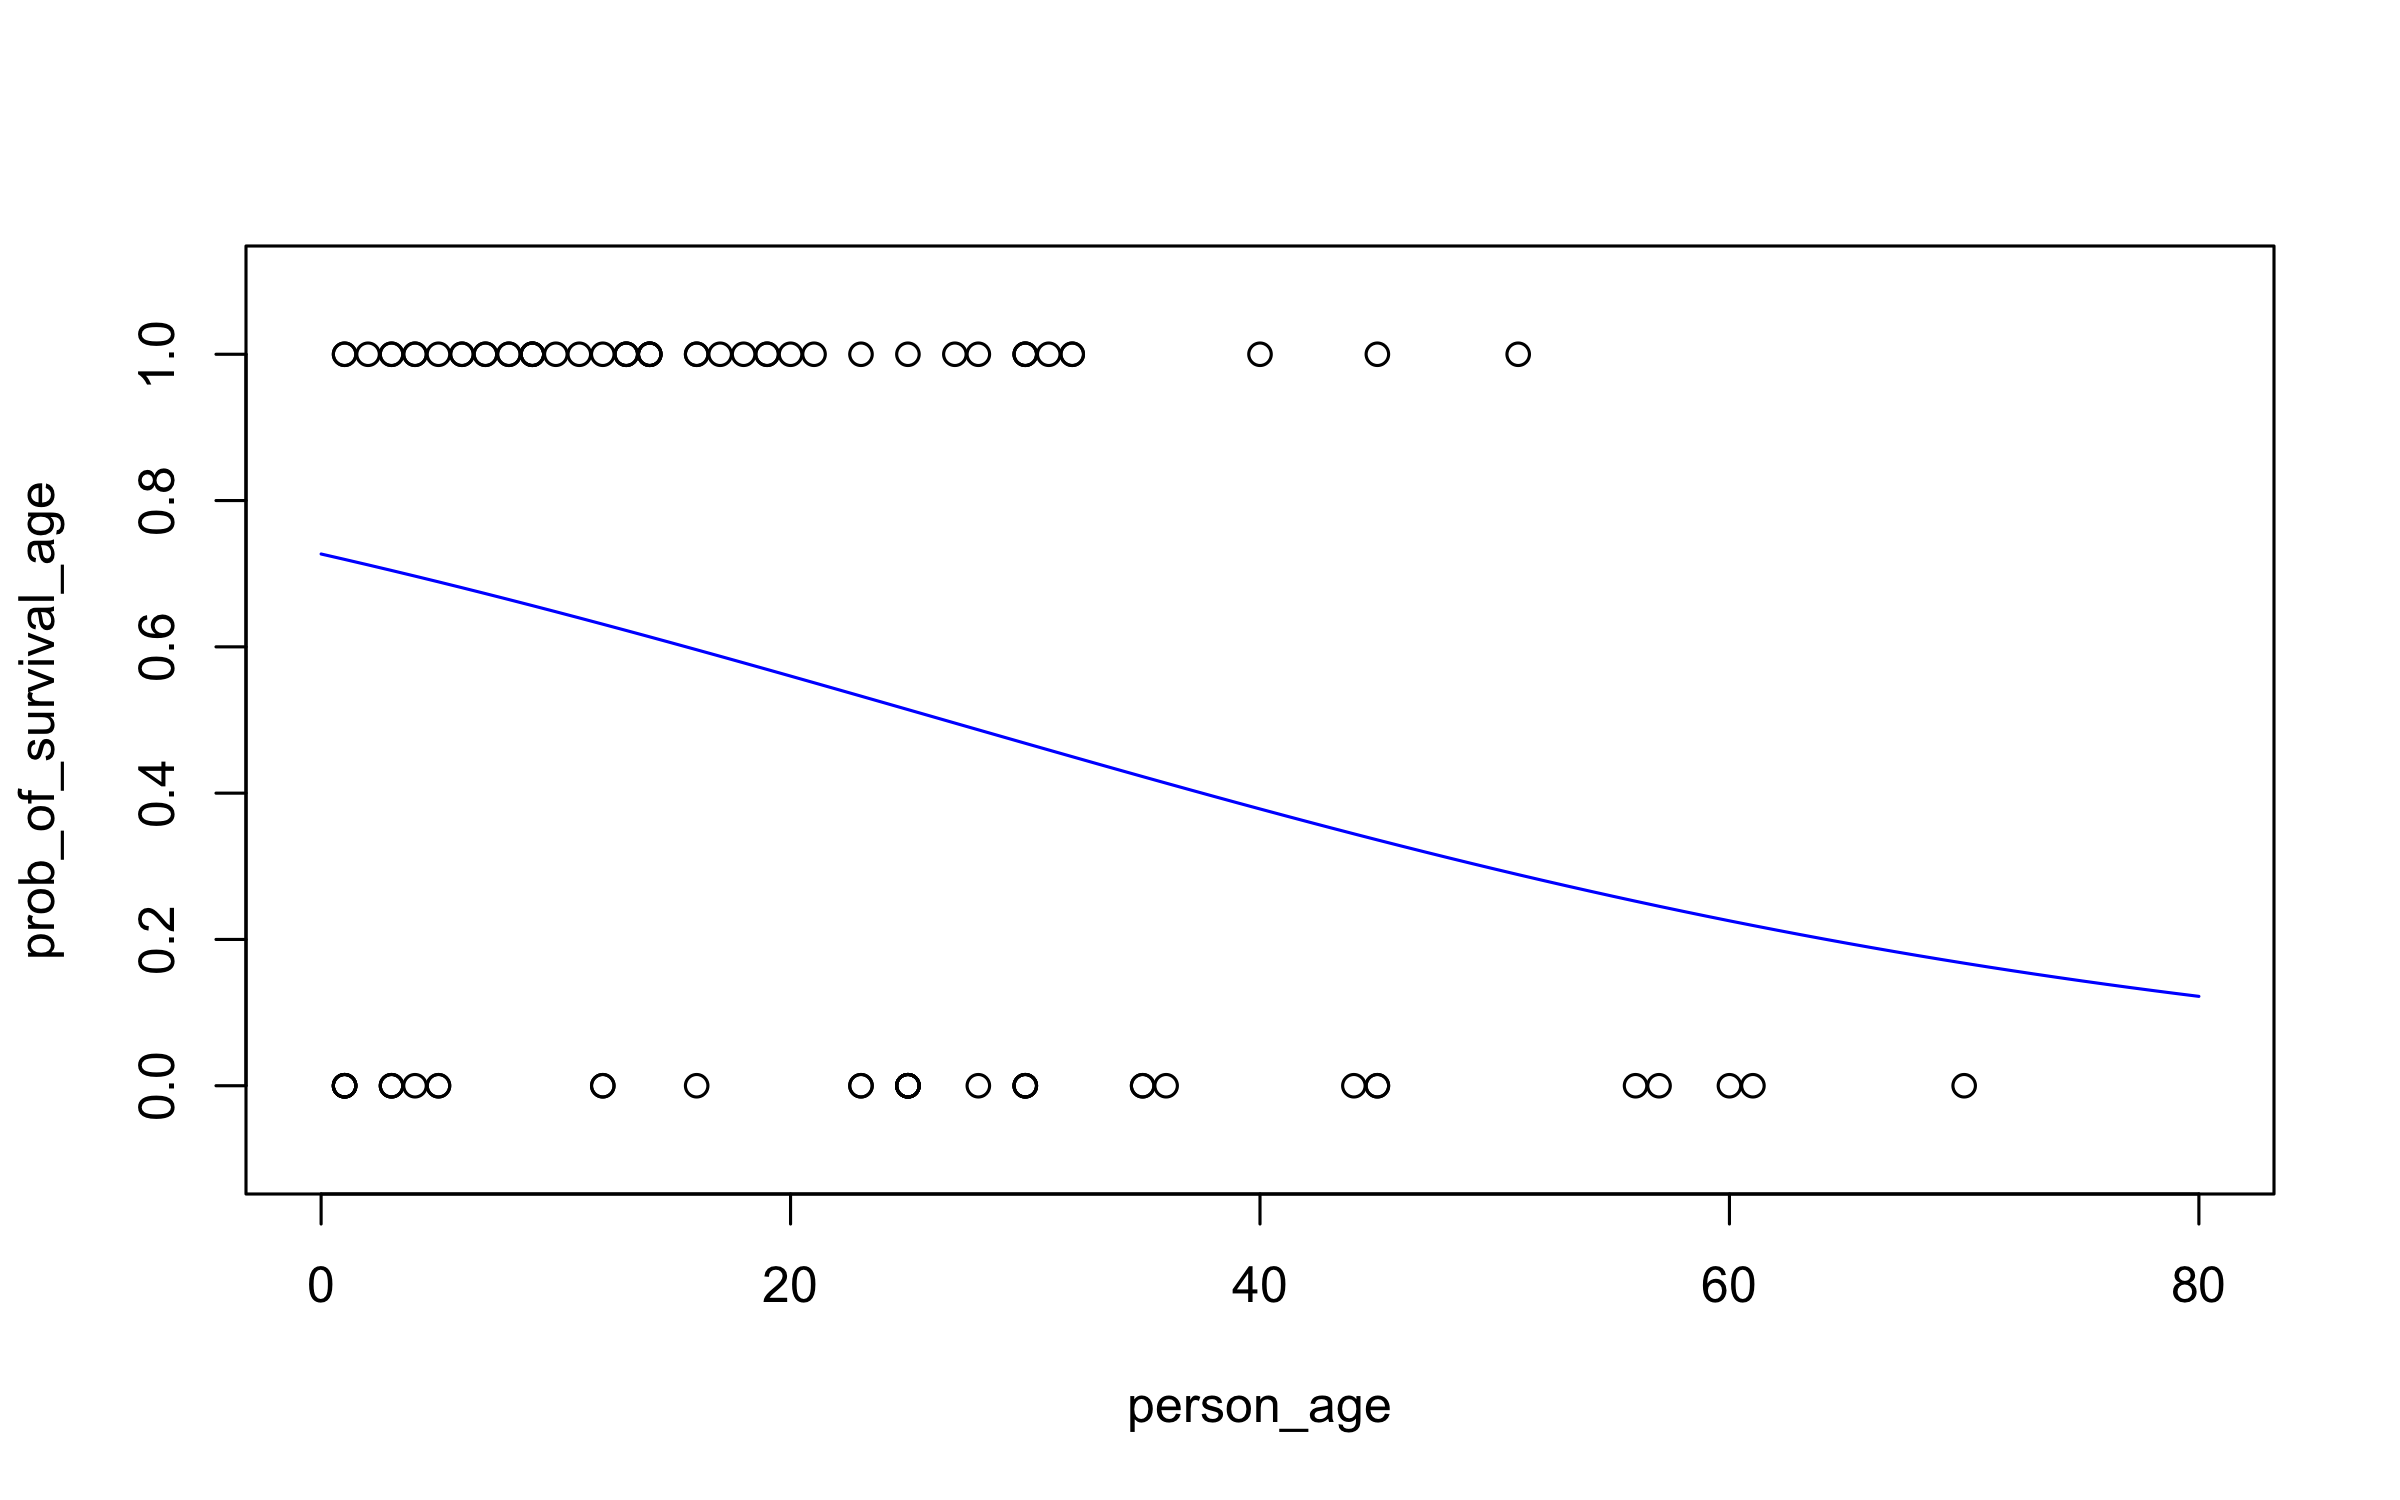

In [38]:
plot(person_age, prob_of_survival_age, type='l', col="blue",ylim=c(-0.1,1.1))
#points(donner$Age, donner$Outcome)
points(donner$age, donner$outcome)

Ok, but what on Earth does this mean??

The simple interpretation is only possible in terms of log probabilities and log probability ratios, but we can get an overall sense.

**Intercept:** The log odds of survival for a party member with an age of 0 - about 75%.

**Slope:** For a unit increase in age (being 1 year older) how much will the log odds ratio change, again, not particularly intuitive.

More often then not we care only about sign and relative magnitude.

Admittedly, this is all pretty weird - do not worry!  We will have lots of time to play around!  For example, we can make a function with our fit just like we did for simple linear regression:

In [39]:
myProbFunction = function(p_age){
  # first, input our cofficients, per usual
  l_survival_age = glm1$coefficients[1] + glm1$coefficients[2]*p_age
  # Then just the one extra step with the "link" function:
  p_survival_age = exp(l_survival_age)/(1.0 + exp(l_survival_age))
  return(unname(p_survival_age)) # use of unname to take out labels
}

Now, we can ask questions like "based on a person's age of X" what is the probability that they survived?

1. what if person is 20?

In [40]:
print(myProbFunction(20))

[1] 0.5600607


2. What about 80?

In [41]:
print(myProbFunction(80))

[1] 0.1221865


3. What about 5?

In [42]:
print(myProbFunction(5))

[1] 0.6888464


These sort of make sense right - younger people are more likely to have survived.

What about our other parameters?  Well, we can also like with SLR, move to MGLM's and fit multiple different sorts of parameters!!

## 4. Multiple GLM!

Now, we want to add in the parameter of the sex of the person (male or female) and see how that effects their probability of survival call is very similar to what we have seen before:

In [43]:
#glm2 = glm(Outcome ~ Age+Sex, data=donner, family=binomial)
glm2 = glm(outcome ~ age+sex, data=donner, family=binomial)

In [44]:
summary(glm2)


Call:
glm(formula = outcome ~ age + sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8828  -1.0383   0.6511   1.0261   1.7386  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.62180    0.50279   3.226  0.00126 **
age         -0.03561    0.01525  -2.336  0.01952 * 
sexMale     -1.06798    0.48229  -2.214  0.02680 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120.86  on 87  degrees of freedom
Residual deviance: 108.87  on 85  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 114.87

Number of Fisher Scoring iterations: 4


Note the "SexMale" call - and its slope $\rightarrow$ this means that in general if Sex == Male, there is a less chance of survival by a factor of ~1.1, i.e. we say "the odds are lower by ~1 if the person is Male".

Let's replot our points with some identifiers for sex and compare to our general model:

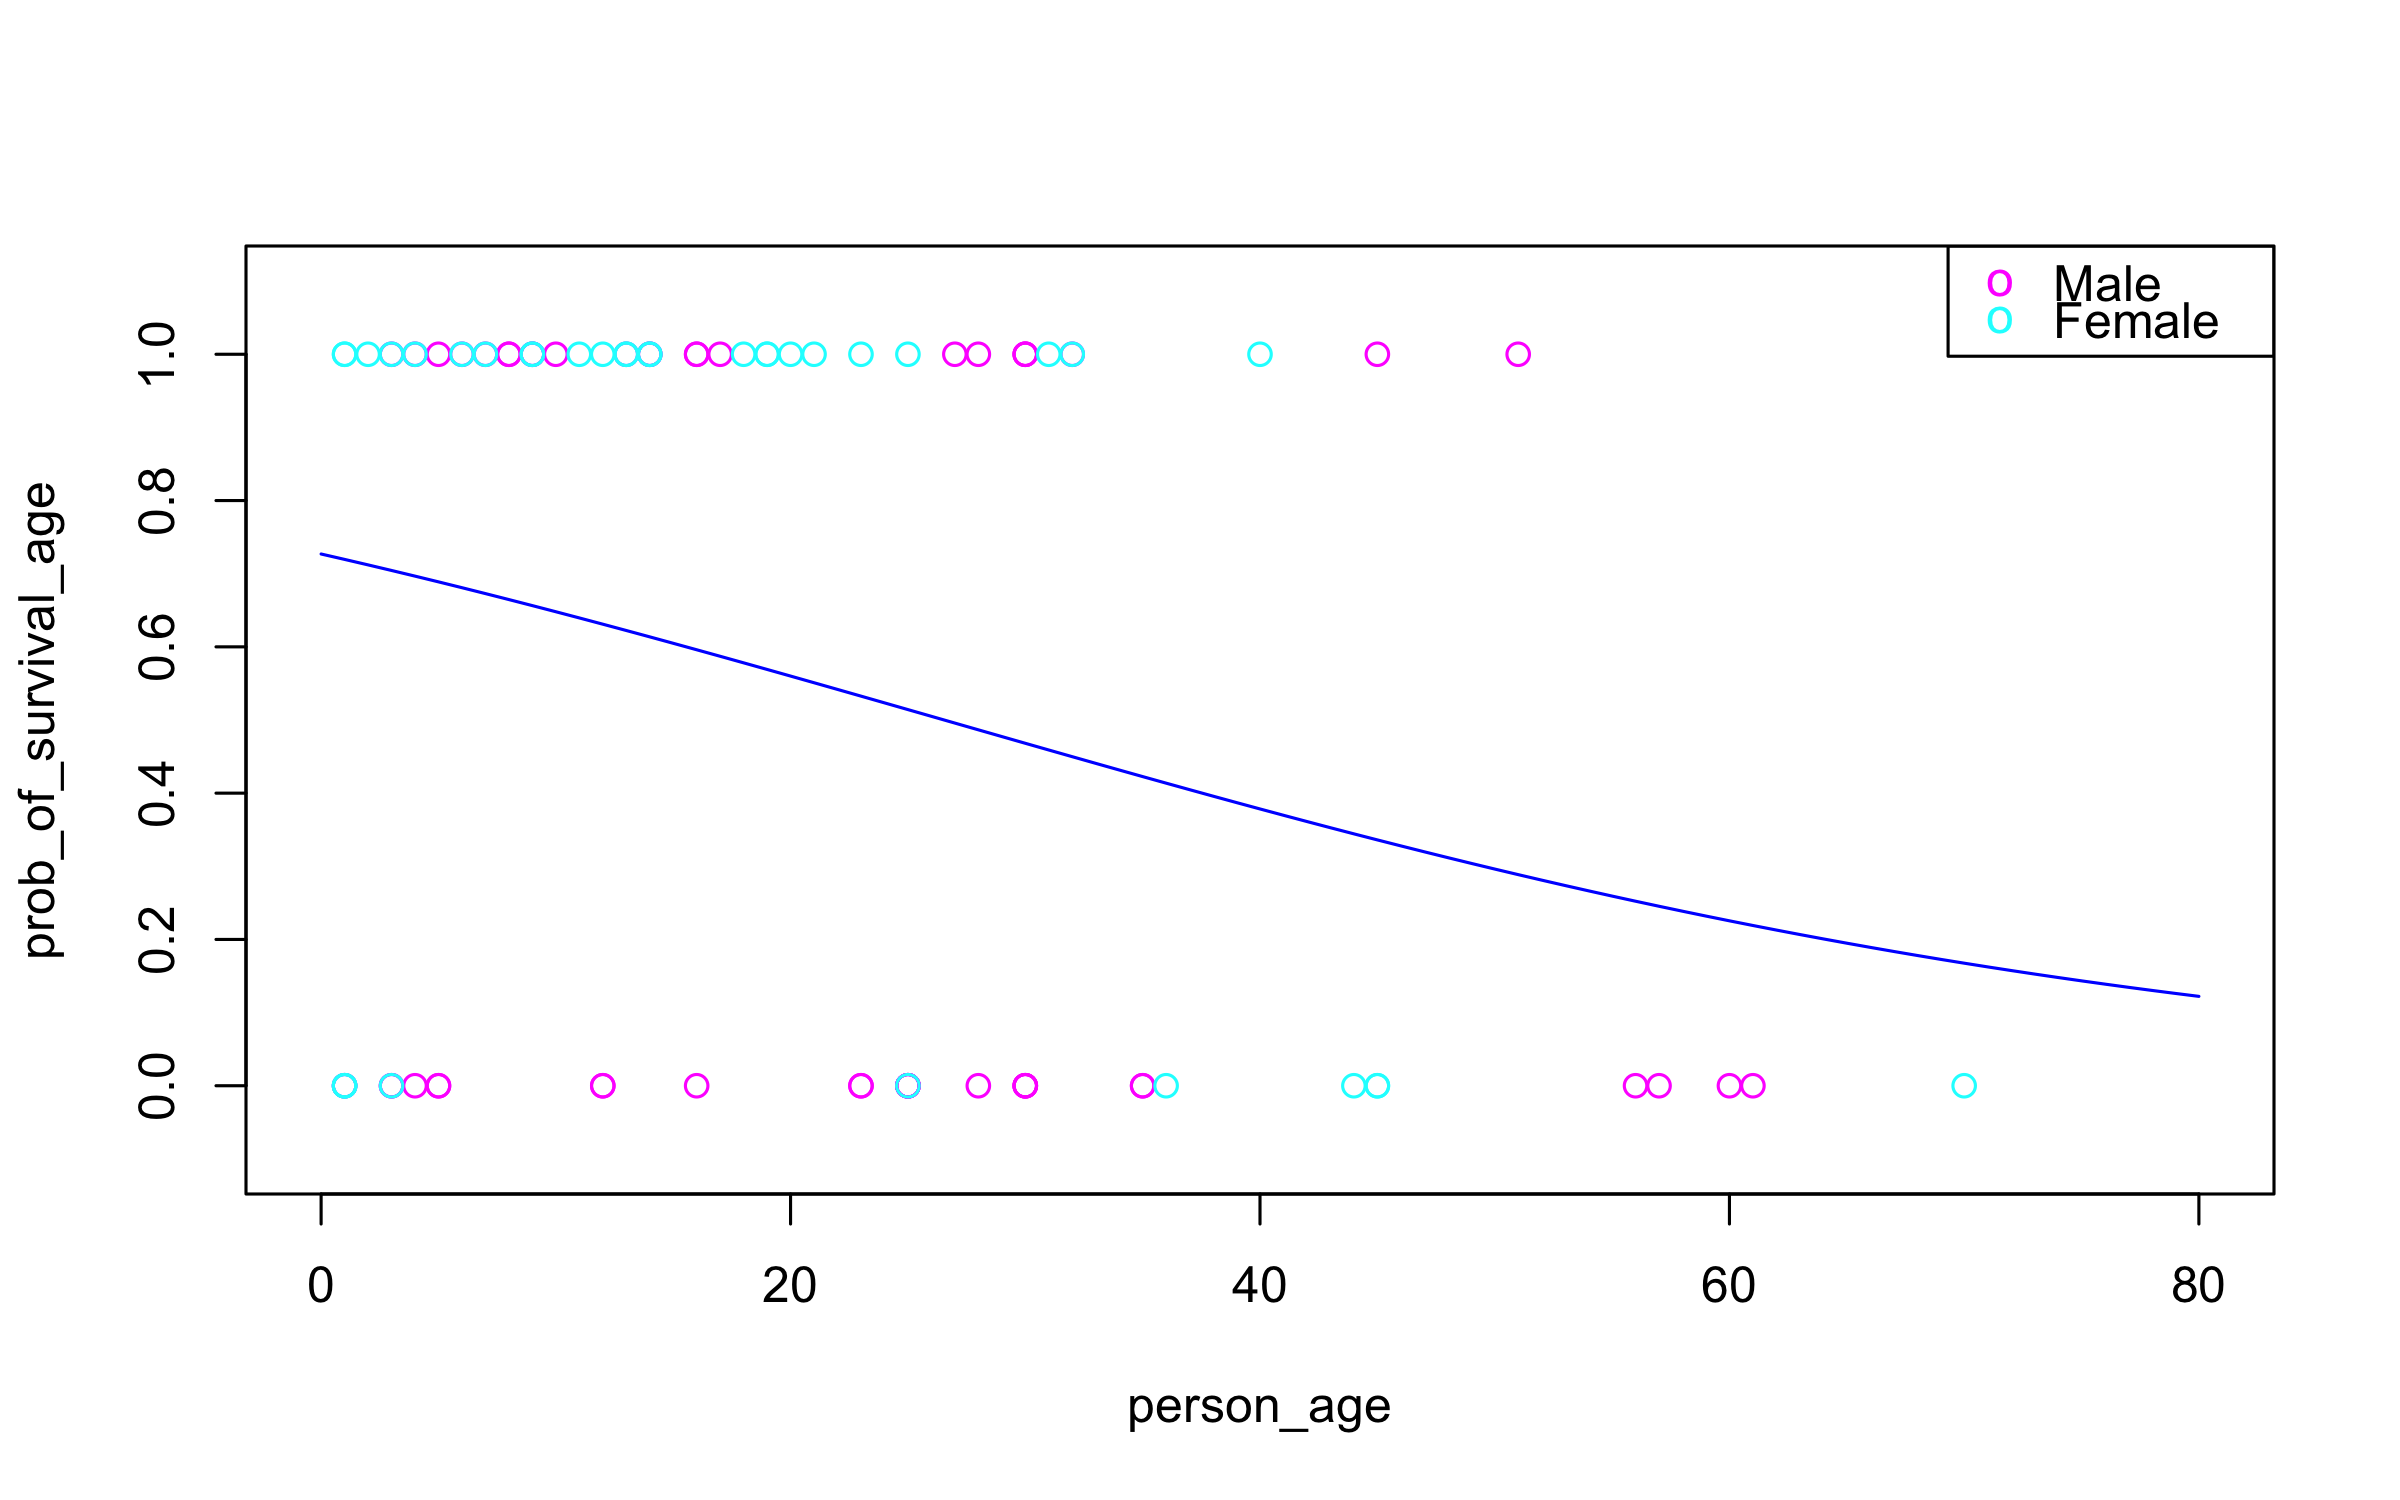

In [45]:
plot(person_age, prob_of_survival_age, type='l', col="blue",ylim=c(-0.1,1.1))
points(donner$age[donner$sex == 'Male'], donner$outcome[donner$sex == 'Male'], col="magenta")
points(donner$age[donner$sex == 'Female'], donner$outcome[donner$sex == 'Female'], col="cyan")

# lets add a legend to keep things straight
legend("topright",c("Male","Female"),col=c("magenta","cyan"), pch="o")

By eye it looks like there are many more male "dead" points clustered around p=0 (i.e. they died) and many more female "alive" points clustered around p=1 (i.e. they survived).  This makes sense with our noting of the negative slope for `SexMale` in the summary of our fit.

Ok, now let's compare this model to the female & male lines alone:

In [46]:
myMultipleProbFunction = function(p_age, MaleFemale){
  mfout = 0 # default female, 0
  if (MaleFemale == 'Male') {mfout = 1} # This is just a way to translate between an input string and M/F binary
  # first, input our cofficients
  l_survival_age = glm2$coefficients[1] + glm2$coefficients[2]*p_age + glm2$coefficients[3]*mfout
  # Extra Step: the link function
  p_survival_age = exp(l_survival_age)/(1.0 + exp(l_survival_age))
  return(unname(p_survival_age))
}

Let's look at a few values for male & female:

In [47]:
print(myMultipleProbFunction(20,'Male'))
print(myMultipleProbFunction(20,'Female'))

[1] 0.4605122
[1] 0.7129379


In [48]:
print(myMultipleProbFunction(10,'Male'))
print(myMultipleProbFunction(10,'Female'))

[1] 0.5492825
[1] 0.7800141


In [49]:
print(myMultipleProbFunction(80,'Male'))
print(myMultipleProbFunction(80,'Female'))

[1] 0.09157135
[1] 0.2267733


Let's also plot these things on our model:

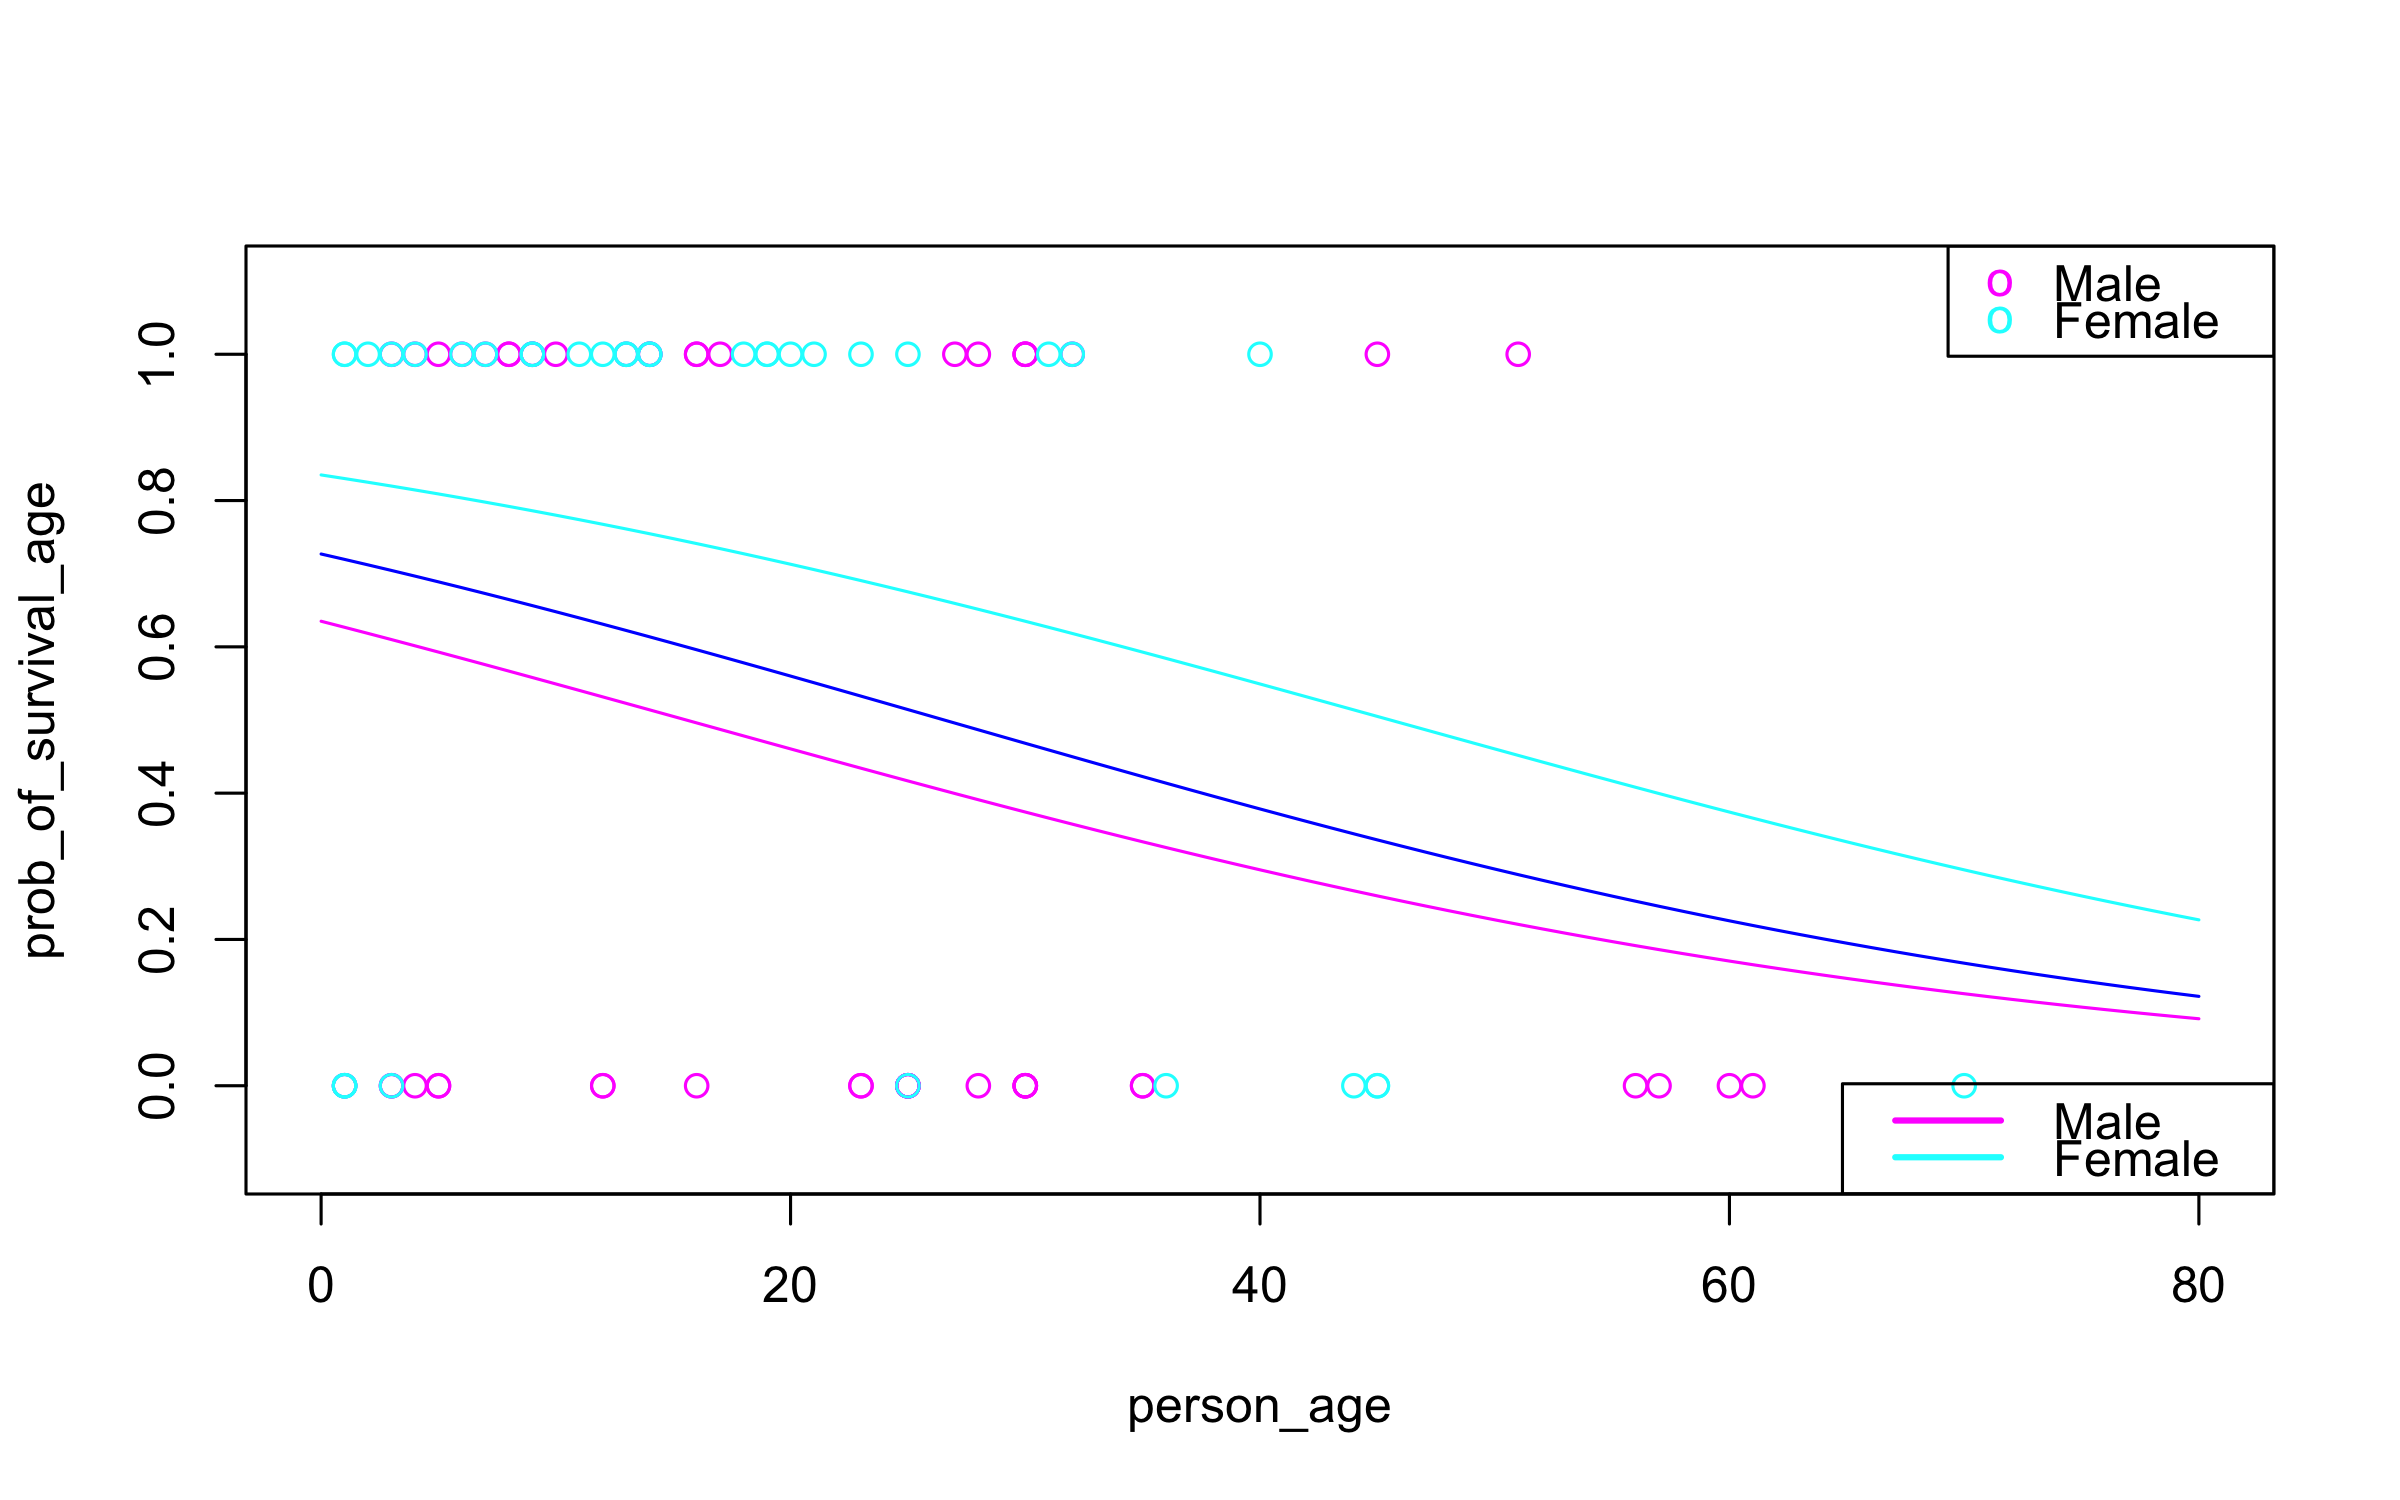

In [50]:
plot(person_age, prob_of_survival_age, type='l', col="blue",ylim=c(-0.1,1.1))
points(donner$age[donner$sex == 'Male'], donner$outcome[donner$sex == 'Male'], col="magenta")
points(donner$age[donner$sex == 'Female'], donner$outcome[donner$sex == 'Female'], col="cyan")

# lets add a legend to keep things straight
legend("topright",c("Male","Female"),col=c("magenta","cyan"), pch="o")


# add lines for new GLM
lines(person_age, myMultipleProbFunction(person_age,'Female'), type='l', col="cyan")
lines(person_age, myMultipleProbFunction(person_age,'Male'), type='l', col="magenta")

# and, again, just to keep our lines straight, lets plot a legend too
legend("bottomright",c("Male","Female"),col=c("magenta","cyan"), lwd=2)

By eye, it really really looks like sex has an effect on survival probobality, but how sure are we of this?

Let's re-look at the summary of our fit for some hypothesis testing:

In [51]:
summary(glm2)


Call:
glm(formula = outcome ~ age + sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8828  -1.0383   0.6511   1.0261   1.7386  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.62180    0.50279   3.226  0.00126 **
age         -0.03561    0.01525  -2.336  0.01952 * 
sexMale     -1.06798    0.48229  -2.214  0.02680 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120.86  on 87  degrees of freedom
Residual deviance: 108.87  on 85  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 114.87

Number of Fisher Scoring iterations: 4


Here, simlar to for the linear model testing:
 * $H_0$: $\beta_{sex}$ (slope of sex) = 0
 * $H_A$: $\beta_{sex}$ != 0

P(Z) where Z = (-1.06798 - 0)/0.48229 

P(Z) = 0.0268 < 0.05 so

We can say that we reject the null hypthesis that there is no logit relationship between age & survival probability.

## 5. BACK TO SLIDES